# Diagram / Figures

This notebook contains diagrams and figures for the paper.

In [2]:
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import scipy as sp
import pandas as pd
import matplotlib as mpl
#plt.style.use('ggplot')

In [3]:
from scipy.stats import multivariate_normal

In [6]:
fig_path = '/data/home/Github/scrna-parameter-estimation/figures/fig1/'

In [35]:
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'figure.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
pylab.rcParams.update(params)


In [36]:
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=False, scatter_alpha=.5):
    def colored_scatter(x, y, c=None):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['color'] = c
            kwargs['alpha'] = scatter_alpha
            kwargs['s'] = 1
            plt.scatter(*args, **kwargs)

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df,
        height=3
    )
    color = {'Group 1':'grey', 'Group 2':'black'}
    legends=[]
    for name, df_group in df.groupby(col_k):
        print(color[name])
        legends.append(name)
        if k_is_color:
            color=name
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y],color[name]),
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color[name], hist=False
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color[name],            
            vertical=True, hist=False
        )
    _, _, ymin, ymax = plt.axis()
    plt.ylim(ymin, ymax+1)
    plt.legend(legends, loc='upper left')

### Toy demo

grey
black


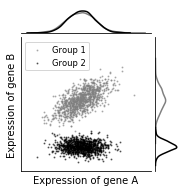

In [41]:
# create 2 kernels
m1 = (3,0);s1 = [[0.1, 0.6], [0.6, 1]]
data1 = multivariate_normal.rvs(mean=m1, cov=s1, size=1000)
m2 = (0,0);s2 = [[0.1, 0], [0, 1]]
data2 = multivariate_normal.rvs(mean=m2, cov=s2, size=1000)
df = pd.DataFrame(
    data=np.vstack([data1, data2]),
    columns=['Expression of gene B', 'Expression of gene A'])
df['condition'] = ['Group 1' for i in range(1000)] + ['Group 2' for i in range(1000)]
multivariateGrid("Expression of gene A", "Expression of gene B", 'condition', df=df)
plt.xticks([])
plt.yticks([])
plt.savefig(fig_path + 'no_dc.pdf', bbox_inches='tight')

grey
black


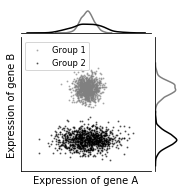

In [40]:
# create 2 kernels
m1 = (2.5,0); s1 = [[0.1, 0], [0, 1]]
data1 = multivariate_normal.rvs(mean=m1, cov=s1, size=1000)
m2 = (0,0); s2 = [[0.1, 0], [0, 5]]
data2 = multivariate_normal.rvs(mean=m2, cov=s2, size=1000)
df = pd.DataFrame(
    data=np.vstack([data1, data2]),
    columns=['Expression of gene B', 'Expression of gene A'])
df['condition'] = ['Group 1' for i in range(1000)] + ['Group 2' for i in range(1000)]
multivariateGrid("Expression of gene A", "Expression of gene B", 'condition', df=df)
plt.xticks([])
plt.yticks([])
plt.savefig(fig_path + 'de_dv_dc.pdf', bbox_inches='tight')

### True distributions

In [7]:
num_cells = 1000000

In [8]:
latent_data_1 = stats.gamma.rvs(10, 3, 1, size=num_cells)
latent_data_2 = stats.gamma.rvs(4, 2, 1, size=num_cells)
latent_data_3 = stats.gamma.rvs(2, 1, 1, size=num_cells)

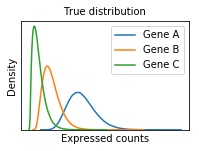

In [9]:
fig = plt.figure(figsize=(3, 2));

sns.distplot(latent_data_1, hist=False, label='Gene A')
sns.distplot(latent_data_2, hist=False, label='Gene B')
sns.distplot(latent_data_3, hist=False, label='Gene C')
plt.xticks([])
plt.yticks([])
plt.xlabel('Expressed counts');
plt.ylabel('Density');
plt.title('True distribution')
plt.legend()
plt.savefig(fig_path + 'three_gene_true.pdf', bbox_inches='tight')

### Observed distribution

In [10]:
def generalized_binom_coef(x,y):

    return sp.special.gamma(x+1) / (sp.special.gamma(y+1) * sp.special.gamma(x-y+1))

class toy_rv(stats.rv_discrete):
    
    def _pmf(self, k, n, p):
        
        return generalized_binom_coef(n, k) * p ** (k) * (1-p)**(n-k)
        

In [11]:
num_cells = 10000

In [12]:
latent_data_1 = stats.gamma.rvs(10, 3, 1, size=num_cells)
latent_data_2 = stats.gamma.rvs(4, 2, 1, size=num_cells)
latent_data_3 = stats.gamma.rvs(2, 1, 1, size=num_cells)

In [13]:
observed_data_1 = toy_rv().rvs(n=latent_data_1, p=0.05)
observed_data_2 = toy_rv().rvs(n=latent_data_2, p=0.05)
observed_data_3 = toy_rv().rvs(n=latent_data_3, p=0.05)

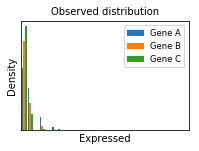

In [39]:
fig = plt.figure(figsize=(3, 2));

plt.hist([
    observed_data_1,
    observed_data_2,
    observed_data_3
], density=True)
plt.xlim(0, latent_data_2.max())
plt.xticks([])
plt.yticks([])
plt.legend(['Gene A', 'Gene B', 'Gene C'])
plt.xlabel('Expressed');
plt.ylabel('Density');
plt.title('Observed distribution')
plt.savefig(fig_path + 'three_gene_obs.pdf', bbox='tight')